# Credit Analysis
by Ehsan Fazel

## Data Preprocessing: Examine the Dataset 

In this document, I preprocess the data to be used in the future for calculating the probability of default (PD) model. I start by examining the dataset, splitting it into train and test set. And then I move on to calculate and visualize Weight of Evidence (WoE). This procedure is done both for discrete and continuous variables. At the end of the document, I go back and repeat the whole process for the test set and save the results.

In [ ]:
import numpy as np
import pandas as pd
import sklearn 
from sklearn import linear_model
from sklearn.utils import shuffle

In [72]:
backup_data = pd.read_csv('loan_final313.csv')
dt_loan = backup_data.copy()

In [73]:
dt_loan.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster


In [74]:
dt_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    887379 non-null  int64  
 1   year                  887379 non-null  int64  
 2   issue_d               887379 non-null  object 
 3   final_d               887379 non-null  int64  
 4   emp_length_int        887379 non-null  float64
 5   home_ownership        887379 non-null  object 
 6   home_ownership_cat    887379 non-null  int64  
 7   income_category       887379 non-null  object 
 8   annual_inc            887379 non-null  int64  
 9   income_cat            887379 non-null  int64  
 10  loan_amount           887379 non-null  int64  
 11  term                  887379 non-null  object 
 12  term_cat              887379 non-null  int64  
 13  application_type      887379 non-null  object 
 14  application_type_cat  887379 non-null  int64  
 15  

In [76]:
type(dt_loan)

pandas.core.frame.DataFrame

In [40]:
dt_loan['emp_length_int'].unique()

array([10.  ,  0.5 ,  1.  ,  3.  ,  8.  ,  9.  ,  4.  ,  5.  ,  6.  ,
        2.  ,  7.  ,  6.05])

In [41]:
type(dt_loan['emp_length_int'][0])

numpy.float64

In [42]:
dt_loan['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
887374     36 months
887375     36 months
887376     60 months
887377     60 months
887378     36 months
Name: term, Length: 887379, dtype: object

In [43]:
dt_loan['term'].describe()

count         887379
unique             2
top        36 months
freq          621125
Name: term, dtype: object

In [44]:
# convert term into integer. replace months with blank
dt_loan['term_int'] = dt_loan['term'].str.replace(' months', '')
dt_loan['term_int']

0          36
1          60
2          36
3          36
4          60
         ... 
887374     36
887375     36
887376     60
887377     60
887378     36
Name: term_int, Length: 887379, dtype: object

In [45]:
dt_loan['term_int'] = pd.to_numeric(dt_loan['term'].str.replace(' months', ''))
dt_loan['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
887374    36
887375    36
887376    60
887377    60
887378    36
Name: term_int, Length: 887379, dtype: int64

In [46]:
dt_loan['issue_d']

0         01/12/2011
1         01/12/2011
2         01/12/2011
3         01/12/2011
4         01/12/2011
             ...    
887374    01/01/2015
887375    01/01/2015
887376    01/01/2015
887377    01/01/2015
887378    01/01/2015
Name: issue_d, Length: 887379, dtype: object

In [47]:
dt_loan['issue_d_date'] = pd.to_datetime(dt_loan['issue_d'], format = '%d/%m/%Y')

In [48]:
dt_loan['issue_d_date']

0        2011-12-01
1        2011-12-01
2        2011-12-01
3        2011-12-01
4        2011-12-01
            ...    
887374   2015-01-01
887375   2015-01-01
887376   2015-01-01
887377   2015-01-01
887378   2015-01-01
Name: issue_d_date, Length: 887379, dtype: datetime64[ns]

### Preprocessing discrete variables

In [49]:
dt_loan['grade']

0         B
1         C
2         C
3         C
4         B
         ..
887374    B
887375    B
887376    D
887377    E
887378    B
Name: grade, Length: 887379, dtype: object

In [50]:
pd.get_dummies(dt_loan['grade'])

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
887374,0,1,0,0,0,0,0
887375,0,1,0,0,0,0,0
887376,0,0,0,1,0,0,0
887377,0,0,0,0,1,0,0


In [51]:
# save all the dummies into a list

dt_loan_dummies = [pd.get_dummies(dt_loan['grade'], prefix = 'grade', prefix_sep = ':'),
                   pd.get_dummies(dt_loan['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                   pd.get_dummies(dt_loan['purpose'], prefix = 'purpose', prefix_sep = ':'),
                   pd.get_dummies(dt_loan['region'], prefix = 'region', prefix_sep = ':'),
                   pd.get_dummies(dt_loan['loan_condition'], prefix = 'loan_condition', prefix_sep = ':')]

In [52]:
# concat them
dt_loan_dummies = pd.concat(dt_loan_dummies, axis = 1)

In [53]:
type(dt_loan_dummies)

pandas.core.frame.DataFrame

In [54]:
dt_loan.columns.values

array(['id', 'year', 'issue_d', 'final_d', 'emp_length_int',
       'home_ownership', 'home_ownership_cat', 'income_category',
       'annual_inc', 'income_cat', 'loan_amount', 'term', 'term_cat',
       'application_type', 'application_type_cat', 'purpose',
       'purpose_cat', 'interest_payments', 'interest_payment_cat',
       'loan_condition', 'loan_condition_cat', 'interest_rate', 'grade',
       'grade_cat', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries',
       'installment', 'region', 'term_int', 'issue_d_date'], dtype=object)

### check for missing values:

In [55]:
# Check for all missing values
pd.options.display.max_rows = None
dt_loan.isnull().sum()

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
term_int                0
issue_d_date            0
dtype: int64

In [56]:
pd.options.display.max_rows = 100

### Data preparation

In [57]:
dt_loan['loan_condition']

0         Good Loan
1          Bad Loan
2         Good Loan
3         Good Loan
4         Good Loan
            ...    
887374    Good Loan
887375    Good Loan
887376    Good Loan
887377    Good Loan
887378    Good Loan
Name: loan_condition, Length: 887379, dtype: object

In [58]:
# convert loan_condition to 1/0
dt_loan['good_bad'] = np.where(dt_loan['loan_condition'].isin(['Bad Loan']), 0, 1)

In [59]:
dt_loan['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
887374    1
887375    1
887376    1
887377    1
887378    1
Name: good_bad, Length: 887379, dtype: int32

### Splitting data

In [60]:
dt_loan_inputs_train, dt_loan_inputs_test, dt_loan_targets_train, dt_loan_targets_test = sklearn.model_selection.train_test_split(dt_loan.drop('good_bad', axis = 1),
                                                                                                          dt_loan['good_bad'], test_size = 0.2, random_state = 42)

In [61]:
# check the dimensions:
dt_loan_inputs_train.head()

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region,term_int,issue_d_date
329489,24043908,2014,01/08/2014,1012016,5.0,OWN,2,Low,47000,1,...,D,4,36.21,6698.74000,3308.94,0.0,391.56,Northern-Irl,60,2014-08-01
510073,65677198,2015,01/11/2015,1012016,7.0,MORTGAGE,3,Low,90000,1,...,C,3,17.83,208.27000,146.09,0.0,212.71,Northern-Irl,36,2015-11-01
905,1058556,2011,01/12/2011,1022014,6.0,MORTGAGE,3,Low,45500,1,...,B,2,8.78,11570.11819,10000.00,0.0,325.74,leinster,36,2011-12-01
333036,23133441,2014,01/07/2014,1012016,8.0,MORTGAGE,3,Low,55000,1,...,B,2,8.16,2697.56000,2059.59,0.0,158.68,ulster,36,2014-07-01
298787,28693850,2014,01/10/2014,1102015,0.5,RENT,1,Low,34000,1,...,C,3,28.24,1819.32000,1311.00,0.0,151.61,Northern-Irl,36,2014-10-01


In [78]:
dt_loan_inputs_train.shape

(709903, 32)

In [79]:
dt_loan_targets_train.shape

(709903,)

In [83]:
dt_loan_inputs_test.shape

(177476, 32)

In [82]:
dt_loan_targets_test.shape

(177476,)

## Data Preprocessing: Calculating WoE and IV

In [85]:
# declare the prepr inputs and targets for train set
df_inputs_prepr = dt_loan_inputs_train
df_targets_prepr = dt_loan_targets_train

In [87]:
# Start with garde:
df_inputs_prepr['grade'].unique()

array(['D', 'C', 'B', 'A', 'E', 'F', 'G'], dtype=object)

In [114]:
def woe_discrete(df, name, good_bad):
    """
    This function calculates weight-of-evidence for a discrete variable in the data set.
    
    Inputs: 
        - df: data frame of either train or test sets.
        - name: name of the discrete variable.
        - good_bad: a column that shows the good/bad loan in the train or test sets.
    
    Output:
        - a table that presents WoE and IV.
    """
    # create a table that contains the variable, number of observations for that variable, and the propotion of good_bad loans
    df = pd.concat([df[name], good_bad], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    
    # drop one repetative column
    df = df.iloc[:, [0, 1, 3]]
    
    # rename the columns, (the variable, number of observation of each category, propotion of good loans)
    df.columns = [df.columns.values[0], 'num_obs', 'prop_good']
    
    # add the percentage based on the number of observation for each category
    df['prop_num_obs'] = df['num_obs'] / df['num_obs'].sum()
    
    # get the number of good and bad loans
    df['num_good'] = df['prop_good'] * df['num_obs']
    df['num_bad'] = (1 - df['prop_good']) * df['num_obs']
    
    # propotion of good and bad loans by number of good and bad loans
    df['prop_num_good'] = df['num_good'] / df['num_good'].sum()
    df['prop_num_bad'] = df['num_bad'] / df['num_bad'].sum()
    
    # get the weight of evidence
    df['WoE'] = np.log(df['prop_num_good'] / df['prop_num_bad'])
    
    # sort by WoE and reset the index
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    
    # get the difference in propotion of good loans and WoE
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    # get the IV and return the dataframe
    df['IV'] = (df['prop_num_good'] - df['prop_num_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [115]:
# comute the table for variable 'grade'
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,num_obs,prop_good,prop_num_obs,num_good,num_bad,prop_num_good,prop_num_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,4385,0.771038,0.006177,3381.0,1004.0,0.005154,0.018631,-1.285076,NaN,NaN,0.328045
1,F,18399,0.810968,0.025918,14921.0,3478.0,0.022745,0.064540,-1.042944,0.039930,0.242133,0.328045
2,E,56544,0.861099,0.079650,48690.0,7854.0,0.074221,0.145744,-0.674805,0.050131,0.368139,0.328045
3,D,111637,0.886149,0.157257,98927.0,12710.0,0.150800,0.235855,-0.447263,0.025050,0.227542,0.328045
4,C,196689,0.922634,0.277065,181472.0,15217.0,0.276628,0.282377,-0.020568,0.036485,0.426695,0.328045
5,B,203700,0.947521,0.286941,193010.0,10690.0,0.294216,0.198371,0.394178,0.024887,0.414745,0.328045
6,A,118549,0.975234,0.166993,115613.0,2936.0,0.176236,0.054482,1.173945,0.027713,0.779767,0.328045


## Data Preprocessing: Vizualize WoE

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [121]:
def plot_woe(df_WoE, rotation_axis = 0):
    """
    This function plots the WoE for each category of the discrete variable
    
    Inputs:
        - df_WoE: the dataframe that was obtain by WoE function
        - rotation_axis is the angle that the axis is shown. This is handy when the names of categories is long
        
    Output:
     - plot of WoE by category
    """
    # x axis is the name of each category
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    
    # select WoE as y
    y = df_WoE['WoE']
    
    # set the figure size
    plt.figure(figsize = (20,10))
    
    # plot x and y
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    
    # label the axis
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    
    # title
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    
    # rotate x axis
    plt.xticks(rotation = rotation_axis)

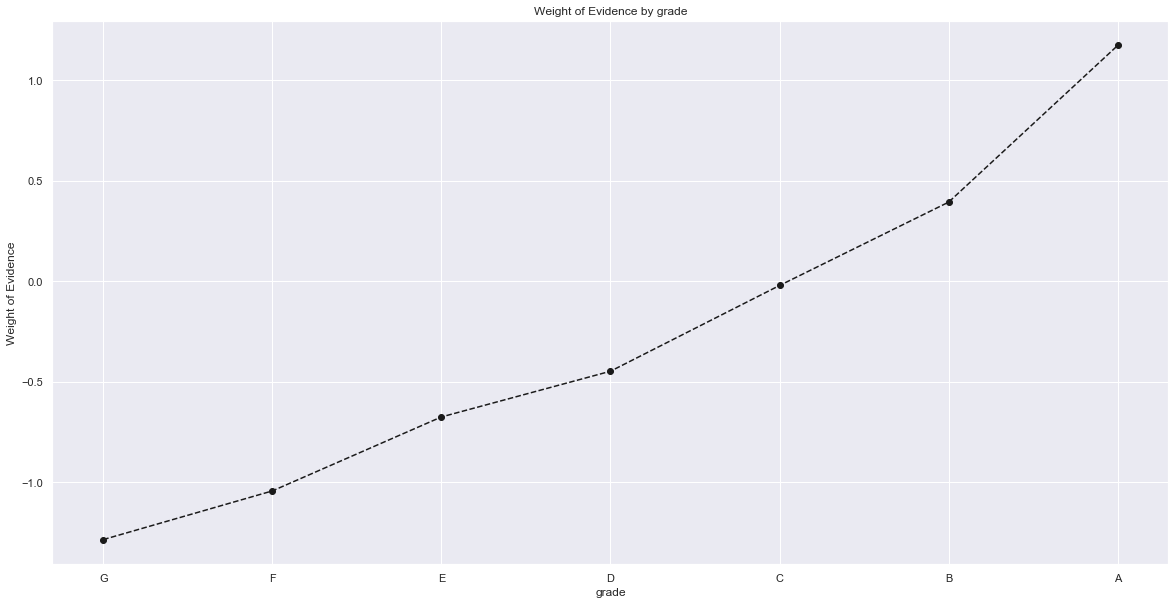

In [122]:
plot_woe(df_temp)